In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

coquimbo cl
linhares br
san jose del palmar co
atuona pf
shamkhal ru
mutsamudu km
jamestown sh
vila franca do campo pt
arraial do cabo br
punta arenas cl
boysun uz
aasiaat gl
sitka us
tasiilaq gl
esperance au
mahibadhoo mv
jamestown sh
barentsburg sj
agua verde mx
mataura pf
sao joao da barra br
avarua ck
busselton au
presidencia roque saenz pena ar
barrow us
pochutla mx
alofi nu
hambantota lk
dikson ru
xining cn
albany au
westport nz
bambous virieux mu
butaritari ki
aden ye
sentyabrskiy ru
mecca sa
vaini to
zheleznodorozhnyy ru
saint george bm
salinas ec
albany au
katherine au
san cristobal ec
kapaa us
leh in
busselton au
palabuhanratu id
pevek ru
maicao co
tuktoyaktuk ca
marcona pe
ushuaia ar
sept-iles ca
talnakh ru
saravan la
bethel us
barrow us
tabou ci
hirado jp
marcona pe
puerto ayora ec
forrest city us
azle us
ahipara nz
tezu in
albany au
albany au
thompson ca
vanimo pg
arraial do cabo br
khatanga ru
kodiak us
shingu jp
albany au
awjilah ly
rikitea pf
angoche mz
taolanaro mg
hit

yellowknife ca
colac au
pisco pe
kutum sd
hihifo to
bosaso so
kavaratti in
port alfred za
busselton au
marsabit ke
bluff nz
nikolskoye ru
cape town za
ojinaga mx
yellowknife ca
khao wong th
victoria sc
kalga ru
mataura pf
ancud cl
klaksvik fo
hobart au
ponta do sol cv
chateauroux fr
chuy uy
mount gambier au
north platte us
emilio carranza mx
jalor in
georgetown sh
khorramshahr ir
turukhansk ru
semey kz
rikitea pf
cockburn town tc
esperance au
albany au
faanui pf
naftah tn
avarua ck
saint george bm
dingle ie
temaraia ki
mataura pf
grand river south east mu
salym ru
doctor arroyo mx
mattru sl
jamestown sh
kununurra au
bathsheba bb
clyde river ca
rikitea pf
castro cl
vaini to
ahipara nz
champerico gt
mahebourg mu
yellowknife ca
arraial do cabo br
saint george bm
zalantun cn
ixtapa mx
sembakung id
husavik is
tucuman ar
tilichiki ru
talnakh ru
hilo us
espanola ca
rawannawi ki
port hedland au
aklavik ca
vao nc
taolanaro mg
kahului us
mahebourg mu
kapaa us
vardo no
kilindoni tz
albany au
flor

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f07a219e33650e4f6fe24d01cfeff2c


In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coquimbo
Processing Record 2 of Set 1 | linhares
Processing Record 3 of Set 1 | san jose del palmar
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | shamkhal
Processing Record 6 of Set 1 | mutsamudu
City not found. Skipping...
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | boysun
Processing Record 12 of Set 1 | aasiaat
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | esperance
Processing Record 16 of Set 1 | mahibadhoo
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | agua verde
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | sao joao da barra
Processing Record 21 of Set 1

Processing Record 39 of Set 4 | deer lake
Processing Record 40 of Set 4 | teguldet
Processing Record 41 of Set 4 | bara
Processing Record 42 of Set 4 | hilo
Processing Record 43 of Set 4 | upernavik
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | caravelas
Processing Record 46 of Set 4 | sangeorz-bai
City not found. Skipping...
Processing Record 47 of Set 4 | meulaboh
Processing Record 48 of Set 4 | khormuj
City not found. Skipping...
Processing Record 49 of Set 4 | cherskiy
Processing Record 50 of Set 4 | chokurdakh
Processing Record 1 of Set 5 | faya
Processing Record 2 of Set 5 | porosozero
Processing Record 3 of Set 5 | joshimath
Processing Record 4 of Set 5 | barra do pirai
Processing Record 5 of Set 5 | isfana
Processing Record 6 of Set 5 | erenhot
Processing Record 7 of Set 5 | cape town
Processing Record 8 of Set 5 | gat
Processing Record 9 of Set 5 | shiyan
Processing Record 10 of Set 5 | trincomalee
Processing Record 11 of Set 5 | hofn
Processin

Processing Record 30 of Set 8 | laguna
Processing Record 31 of Set 8 | prado
Processing Record 32 of Set 8 | kouroussa
Processing Record 33 of Set 8 | kanth
Processing Record 34 of Set 8 | piacabucu
Processing Record 35 of Set 8 | kaluga
Processing Record 36 of Set 8 | russell
Processing Record 37 of Set 8 | souillac
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | qaqortoq
Processing Record 40 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 41 of Set 8 | alice springs
Processing Record 42 of Set 8 | waycross
Processing Record 43 of Set 8 | el dorado
Processing Record 44 of Set 8 | abdanan
Processing Record 45 of Set 8 | karpathos
Processing Record 46 of Set 8 | piterka
Processing Record 47 of Set 8 | viligili
City not found. Skipping...
Processing Record 48 of Set 8 | redcliffe
Processing Record 49 of Set 8 | arlit
Processing Record 50 of Set 8 | tuatapere
Processing Record 1 of Set 9 | san luis
Processing Record 2 of Set 9 | correntina
Proces

Processing Record 17 of Set 12 | knysna
Processing Record 18 of Set 12 | urumqi
Processing Record 19 of Set 12 | barawe
City not found. Skipping...
Processing Record 20 of Set 12 | karamea
City not found. Skipping...
Processing Record 21 of Set 12 | santiago de cao
Processing Record 22 of Set 12 | ginda
Processing Record 23 of Set 12 | sur
Processing Record 24 of Set 12 | samusu
City not found. Skipping...
Processing Record 25 of Set 12 | tidore
City not found. Skipping...
Processing Record 26 of Set 12 | krasnyy yar
Processing Record 27 of Set 12 | poum
Processing Record 28 of Set 12 | sydney mines
Processing Record 29 of Set 12 | salalah
Processing Record 30 of Set 12 | panjab
Processing Record 31 of Set 12 | neepawa
Processing Record 32 of Set 12 | onega
Processing Record 33 of Set 12 | mahon
Processing Record 34 of Set 12 | hervey bay
Processing Record 35 of Set 12 | general cepeda
Processing Record 36 of Set 12 | buchanan
Processing Record 37 of Set 12 | aksha
Processing Record 38

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coquimbo,-29.9533,-71.3436,63.45,65,0,6.24,CL,2022-05-01 17:04:14
1,Linhares,-19.3911,-40.0722,87.22,44,28,4.92,BR,2022-05-01 17:07:50
2,San Jose Del Palmar,4.9742,-76.2283,71.11,87,99,4.56,CO,2022-05-01 17:07:51
3,Atuona,-9.8000,-139.0333,78.67,77,58,13.71,PF,2022-05-01 17:03:37
4,Shamkhal,43.0596,47.3373,57.18,81,58,5.14,RU,2022-05-01 17:07:52
5,Jamestown,42.0970,-79.2353,50.52,89,100,14.97,US,2022-05-01 17:03:43
6,Vila Franca Do Campo,37.7167,-25.4333,64.81,68,12,2.77,PT,2022-05-01 17:07:53
7,Arraial Do Cabo,-22.9661,-42.0278,84.06,65,0,16.11,BR,2022-05-01 17:07:47
8,Punta Arenas,-53.1500,-70.9167,48.11,87,85,6.11,CL,2022-05-01 17:07:53
9,Boysun,38.2061,67.1986,74.71,32,90,3.24,UZ,2022-05-01 17:05:21


In [28]:
# assign a variable to an array of the columns in the order we want them to appear
new_column_order = ["City", "Country", "Date", "Lat", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# assign the same DataFrame with new column order
# df = df[new_column_order]

city_data_df = city_data_df[new_column_order] 
city_data_df.head(10)

,City,Country,Date,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coquimbo,CL,2022-05-01 17:04:14,-29.9533,63.45,65,0,6.24
1,Linhares,BR,2022-05-01 17:07:50,-19.3911,87.22,44,28,4.92
2,San Jose Del Palmar,CO,2022-05-01 17:07:51,4.9742,71.11,87,99,4.56
3,Atuona,PF,2022-05-01 17:03:37,-9.8000,78.67,77,58,13.71
4,Shamkhal,RU,2022-05-01 17:07:52,43.0596,57.18,81,58,5.14
5,Jamestown,US,2022-05-01 17:03:43,42.0970,50.52,89,100,14.97
6,Vila Franca Do Campo,PT,2022-05-01 17:07:53,37.7167,64.81,68,12,2.77
7,Arraial Do Cabo,BR,2022-05-01 17:07:47,-22.9661,84.06,65,0,16.11
8,Punta Arenas,CL,2022-05-01 17:07:53,-53.1500,48.11,87,85,6.11
9,Boysun,UZ,2022-05-01 17:05:21,38.2061,74.71,32,90,3.24


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [33]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1651432419.870446

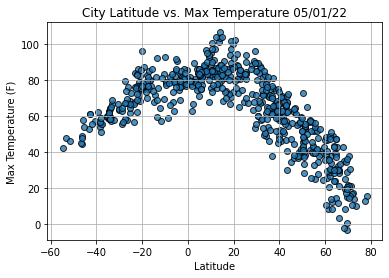

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

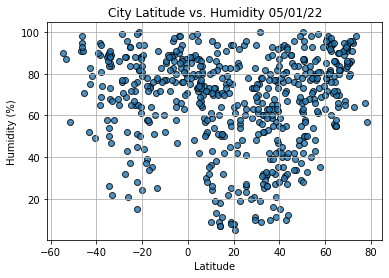

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

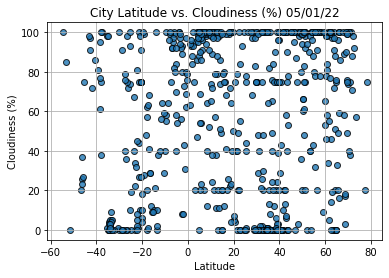

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

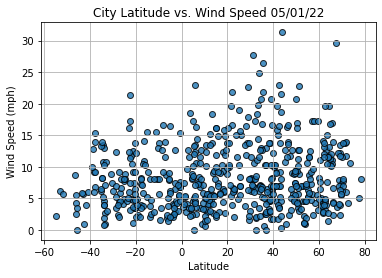

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()